# Import All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle
import json

# Step 1 : Problem Statement
    To predict car price based on below mentioned features
    
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
    'highway-mpg'

# Step 2 : Data Gathering

In [2]:
df = pd.read_csv('autos_dataset.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# Step 3 :EDA
    1.check distribution
    2. data types
    3. missing values
    4. outliers detection
    5. scale of the data
    6. assumptions

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# data contains symbols
# data contains object datatype
# data distribution
# outliers
# Assumptions

In [6]:
## After changing the ? values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# 3.1 Symboling

In [9]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [10]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

#### need discussion on this column

#### 3.2 normalized-losses

In [11]:
df['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [12]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [13]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [14]:
## this column need to convert into int
## miising values found need to handle

#### 3.3 make

In [15]:
df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [16]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df['make'].nunique()

22

In [18]:
df['make'].unique() # this nominal data : Solution = one hot encoding

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### 3.4 fuel-type

In [19]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [20]:
df['fuel-type'].nunique()

2

In [21]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [22]:
## this is categorical data (Nominal data ) : one hot encoding

#### 3.5 num-of-doors


In [23]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [24]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [25]:
## This is ordianl data we have to convert into  numerical format
## solution : label encoding


# Step 4 Feature Engineering

#### <center> replace ? marks with nan values </center>

In [26]:
df =df.replace({'?':np.nan})

In [27]:
df['normalized-losses'] =df['normalized-losses'].astype(float)

In [28]:
## handling missing values for normalisez-losses
df['normalized-losses'].mean()
df['normalized-losses'].median()
df['normalized-losses'].mode()[0]

161.0

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

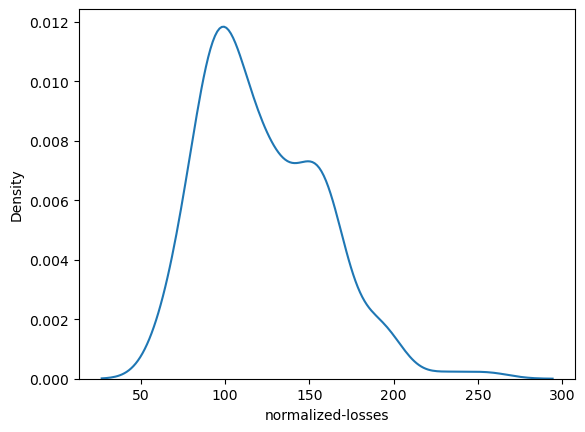

In [29]:
sns.kdeplot(df['normalized-losses'])

In [30]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace= True)

In [31]:
df['normalized-losses'].isna().sum()

0

In [32]:
df['normalized-losses'].dtype

dtype('float64')

In [33]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [34]:
df['normalized-losses'].dtype

dtype('int32')

# 4.3 make

In [35]:
df = pd.get_dummies(df,columns=['make'])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,115,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,115,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    object 
 3   aspiration          205 non-null    object 
 4   num-of-doors        203 non-null    object 
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

In [37]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [38]:
df.info

<bound method DataFrame.info of      symboling  normalized-losses fuel-type aspiration num-of-doors  \
0            3                115       gas        std          two   
1            3                115       gas        std          two   
2            1                115       gas        std          two   
3            2                164       gas        std         four   
4            2                164       gas        std         four   
..         ...                ...       ...        ...          ...   
200         -1                 95       gas        std         four   
201         -1                 95       gas      turbo         four   
202         -1                 95       gas        std         four   
203         -1                 95    diesel      turbo         four   
204         -1                 95       gas      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           f

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    object 
 3   aspiration          205 non-null    object 
 4   num-of-doors        203 non-null    object 
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

# 4.4 fuel-type 

In [40]:
df['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [41]:
df['fuel-type'].replace({'gas': 1, 'diesel': 0},inplace=True)

In [42]:
df['fuel-type'].isna().sum()

0

In [43]:
df['fuel-type'].dtype

dtype('int64')

# 4.5 aspiration

In [44]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [45]:
df['aspiration'].replace({'std': 0, 'turbo': 1},inplace=True)

In [46]:
df.aspiration.isna().sum()

0

In [47]:
df.aspiration.dtype

dtype('int64')

In [48]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

# 3.6 num-of-doors

In [49]:
df['num-of-doors'].dtype

dtype('O')

In [50]:
df['num-of-doors'].nunique()

2

In [51]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [52]:
# this is ordinal data

In [53]:
# lable encoding
df['num-of-doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [54]:
df['num-of-doors'].replace({'four': 4, 'two': 2},inplace=True)

In [55]:
df['num-of-doors'].dtype

dtype('float64')

In [56]:
df['num-of-doors'].isna().sum()

2

<AxesSubplot:xlabel='num-of-doors', ylabel='Density'>

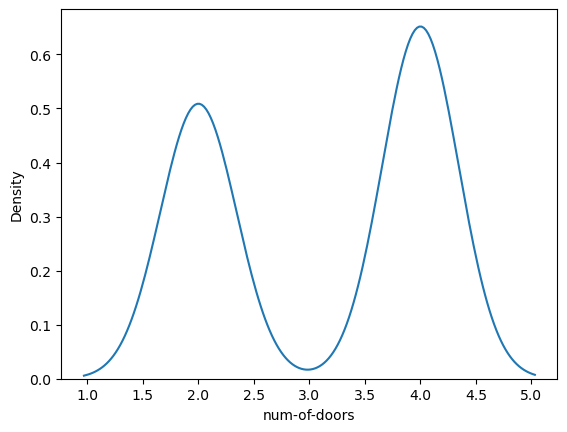

In [57]:
sns.kdeplot(df['num-of-doors'])

In [58]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace=True)

In [59]:
df['num-of-doors'].isna().sum()

0

In [60]:
df['num-of-doors'].dtype

dtype('float64')

In [61]:
df['num-of-doors'] = df['num-of-doors'].astype(int)

In [62]:
df['num-of-doors'].dtype

dtype('int32')

# 3.7 body-style

In [63]:
df['body-style'].dtype

dtype('O')

In [64]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [65]:
# this is an catogorical data [Nominal data]
# one hot encoding

In [66]:
df = pd.get_dummies(df,columns=['body-style'])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,1,0,2,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,115,1,0,2,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,115,1,0,2,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164,1,0,4,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,164,1,0,4,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,0,4,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
201,-1,95,1,1,4,rwd,front,109.1,188.8,68.8,...,0,0,0,0,1,0,0,0,1,0
202,-1,95,1,0,4,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0
203,-1,95,0,1,4,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,1,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    object 
 6   engine-location         205 non-null    object 
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

# 3.8 drive-wheels

In [68]:
df['drive-wheels'].dtype

dtype('O')

In [69]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [70]:
# this nominal data

In [71]:
df= pd.get_dummies(df,columns=['drive-wheels'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    object 
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  engine-type             205 non-null    object 
 12  num-of-cylinders        205 non-null    object 
 13  engine-size             205 non-null    int64  
 14  fuel-system             205 non-null    ob

# 3.9 engine-location

In [72]:
df['engine-location'].dtype

dtype('O')

In [73]:
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [74]:
# this ordinal data

In [75]:
# lable encoding

In [76]:
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [77]:
df['engine-location'].replace({'front': 0, 'rear': 1},inplace=True)

In [78]:
df['engine-location'].dtype

dtype('int64')

In [79]:
df['engine-location'].isna().sum()

0

# 3.10 wheel-base

In [80]:
df['wheel-base']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [81]:
df['wheel-base'].isna().sum()

0

<AxesSubplot:xlabel='wheel-base', ylabel='Density'>

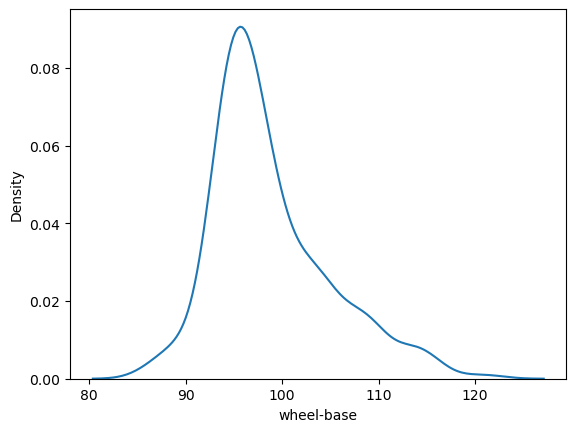

In [82]:
sns.kdeplot(df['wheel-base'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheel-base'>

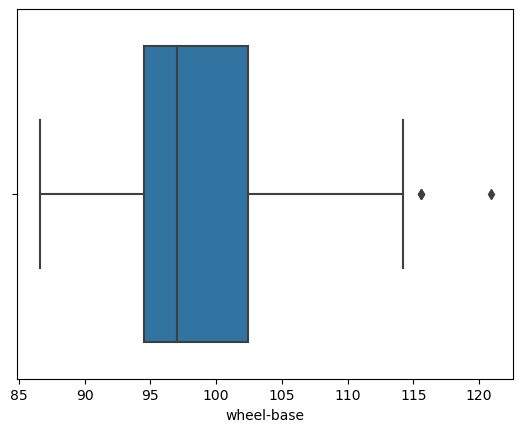

In [83]:
sns.boxplot(df['wheel-base'])

<AxesSubplot:xlabel='wheel-base'>

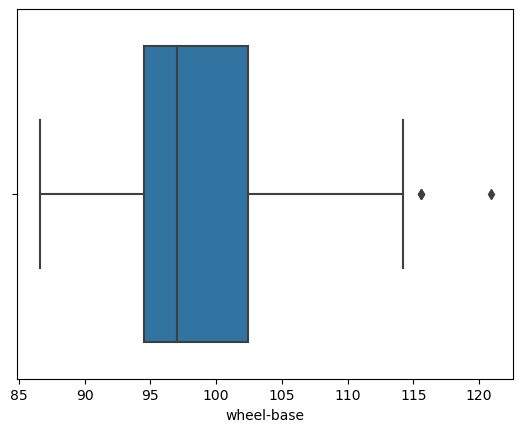

In [84]:
sns.boxplot(x= df['wheel-base'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  engine-type             205 non-null    object 
 12  num-of-cylinders        205 non-null    object 
 13  engine-size             205 non-null    int64  
 14  fuel-system             205 non-null    ob

In [86]:
df.isna().sum()

symboling                 0
normalized-losses         0
fuel-type                 0
aspiration                0
num-of-doors              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-type               0
num-of-cylinders          0
engine-size               0
fuel-system               0
bore                      4
stroke                    4
compression-ratio         0
horsepower                2
peak-rpm                  2
city-mpg                  0
highway-mpg               0
price                     4
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan         

# 3.11 engine-type  

In [87]:
df['engine-type'].dtype

dtype('O')

In [88]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [89]:
df = pd.get_dummies(df,columns=['engine-type'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    object 
 12  engine-size             205 non-null    int64  
 13  fuel-system             205 non-null    object 
 14  bore                    201 non-null    ob

# 3.12 num-of-cylinders

In [91]:
df['num-of-cylinders'].dtype

dtype('O')

In [92]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [93]:
## this is an ordinal data

In [94]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [95]:
# lavble encoding
df['num-of-cylinders'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12},inplace=True)

In [96]:
df['num-of-cylinders'].dtype

dtype('int64')

In [97]:
df['num-of-cylinders'].isna().sum()

0

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  fuel-system             205 non-null    object 
 14  bore                    201 non-null    ob

# 3.13 fuel-system

In [99]:
df['fuel-system'].dtype

dtype('O')

In [100]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [101]:
# this is nominal data
# one hot encoding
df = pd.get_dummies(df,columns=['fuel-system'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    201 non-null    object 
 14  stroke                  201 non-null    ob

# 3.14 bore

In [103]:
df['bore'].dtype

dtype('O')

In [104]:
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: bore, dtype: int64

In [105]:
df['bore'] = df['bore'].astype(float)

In [106]:
df['bore'].dtype

dtype('float64')

In [107]:
df['bore'].isna().sum()

4

<AxesSubplot:xlabel='bore', ylabel='Density'>

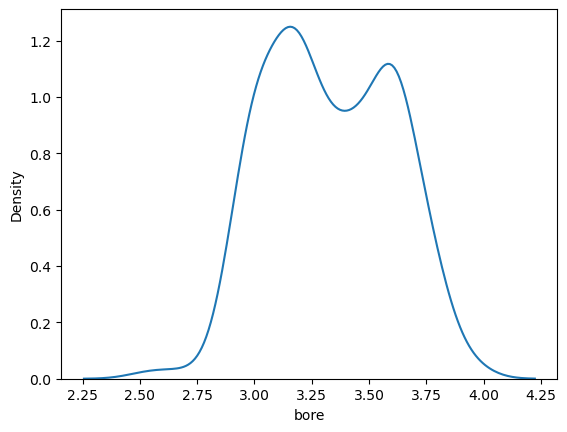

In [108]:
sns.kdeplot(df['bore'])

In [109]:
df['bore'].fillna(df['bore'].median(),inplace=True)

In [110]:
df['bore'].isna().sum()

0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  201 non-null    ob

# 3.15 stroke

In [112]:
df['stroke'].dtype

dtype('O')

In [113]:
df['stroke'].value_counts()

3.4     20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.5      6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.9      3
2.9      3
3.08     2
2.19     2
2.68     2
3.1      2
4.17     2
2.8      2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [114]:
df['stroke'].isna().sum()

4

In [115]:
df['stroke'].fillna(df['stroke'].median(),inplace=True)

In [116]:
df['stroke'] = df['stroke'].astype(float)

In [117]:
df['stroke'].dtype

dtype('float64')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

# 3.16 horsepower

In [119]:
df['horsepower'].dtype

dtype('O')

In [120]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [121]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
82      5
84      5
102     5
92      4
111     4
123     4
86      4
207     3
182     3
90      3
121     3
152     3
85      3
73      3
161     2
94      2
56      2
112     2
184     2
155     2
156     2
52      2
100     2
162     2
176     2
140     1
115     1
134     1
78      1
48      1
288     1
143     1
142     1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64

In [122]:
df['horsepower'].isna().sum()

2

In [123]:
df['horsepower'].median()

95.0

In [124]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [125]:
df['horsepower'] = df['horsepower'].astype(int)

In [126]:
df['horsepower'].dtype

dtype('int32')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

# 3.17  peak-rpm

In [128]:
df['peak-rpm'].dtype

dtype('O')

In [129]:
df['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [130]:
df['peak-rpm'].isna().sum()

2

In [131]:
df['peak-rpm'] = df['peak-rpm'].astype(float)

<AxesSubplot:xlabel='peak-rpm', ylabel='Density'>

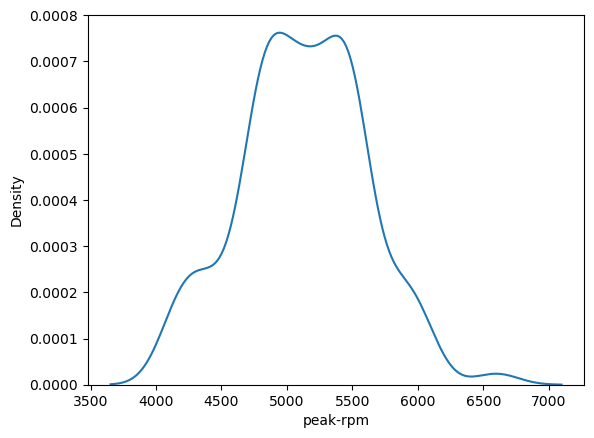

In [132]:
sns.kdeplot(df['peak-rpm'])

In [133]:
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)

In [134]:
df['peak-rpm'].isna().sum()

0

In [135]:
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['peak-rpm'].dtype

dtype('int32')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

# 3.18 price

In [137]:
df['price'].dtype

dtype('O')

In [138]:
df['price'].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [139]:
df['price'].fillna(df['price'].median(),inplace=True)

In [140]:
df['price']=df['price'].astype(int)

In [141]:
df['price'].dtype

dtype('int32')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

# Assumptions

             1 . linearity
            2. independence
            3. no multicolinearity


In [143]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,-0.021510,-0.073709,-0.006837,0.058378,-0.365674,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,-0.057191,0.257611,0.234539,0.300567,0.087311,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.139129,0.439635,0.385675,0.197735,0.540286,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.194311,-0.104668,-1.000000,0.401397,0.188496,-0.040070,0.308346,0.212679,0.233880,0.284631,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuel-system_mfi,0.122067,0.053844,0.023020,0.149190,-0.079932,-0.008532,-0.033294,-0.004831,0.012832,-0.101245,...,-0.018218,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuel-system_mpfi,0.012532,0.179458,0.302574,-0.050041,0.035746,0.132429,0.348891,0.511374,0.461896,0.108685,...,0.282760,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuel-system_spdi,0.181939,0.052231,0.070457,0.394703,-0.148565,-0.026114,-0.117359,-0.079790,-0.046399,-0.278615,...,-0.055759,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


In [144]:
df.iloc[:,:10].corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,0.212471,-0.531954,-0.357612,-0.232919,-0.541038
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,-0.021510,-0.073709,-0.006837,0.058378,-0.365674
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,0.040070,-0.308346,-0.212679,-0.233880,-0.284631
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,-0.057191,0.257611,0.234539,0.300567,0.087311
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.139129,0.439635,0.385675,0.197735,0.540286
engine-location,0.212471,-0.021510,0.040070,-0.057191,-0.139129,1.000000,-0.187790,-0.050989,-0.051698,-0.106234
wheel-base,-0.531954,-0.073709,-0.308346,0.257611,0.439635,-0.187790,1.000000,0.874587,0.795144,0.589435
length,-0.357612,-0.006837,-0.212679,0.234539,0.385675,-0.050989,0.874587,1.000000,0.841118,0.491029
width,-0.232919,0.058378,-0.233880,0.300567,0.197735,-0.051698,0.795144,0.841118,1.000000,0.279210
height,-0.541038,-0.365674,-0.284631,0.087311,0.540286,-0.106234,0.589435,0.491029,0.279210,1.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int32  
 5   engine-location         205 non-null    int64  
 6   wheel-base              205 non-null    float64
 7   length                  205 non-null    float64
 8   width                   205 non-null    float64
 9   height                  205 non-null    float64
 10  curb-weight             205 non-null    int64  
 11  num-of-cylinders        205 non-null    int64  
 12  engine-size             205 non-null    int64  
 13  bore                    205 non-null    float64
 14  stroke                  205 non-null    fl

In [146]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-ty

In [147]:
col_list = ['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore','price']

df.loc[:,col_list].corr().tail(1)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,price
price,-0.080149,0.095489,-0.112439,0.175745,0.046497,0.331459,0.584847,0.686567,0.724558,0.140439,0.819817,0.681036,0.860343,0.532861,1.0


# step 5 feature selection

In [148]:
df.shape

(205, 66)

# step 6 : model training


In [149]:
x = df.drop('price',axis=1)
y = df['price']

In [150]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,1,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115,1,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115,1,0,2,0,94.5,171.2,65.5,52.4,...,1,0,0,0,0,0,0,1,0,0
3,2,164,1,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,0,4,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,1,1,4,0,109.1,188.8,68.8,55.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,1,0,4,0,109.1,188.8,68.9,55.5,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,0,1,4,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,0


In [151]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=9)

In [153]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((164, 65), (164,), (41, 65), (41,))

In [154]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# step 7 model evaluation

In [155]:
y_pred = model.predict(x_test)

In [156]:
y_pred

array([15457.64081897,  6194.05496729, 12733.63241446, 42046.84695483,
        5673.05447228, 16097.1261268 ,  9589.75791749,  7478.29967314,
        9296.14191456,  6899.64852285, 16544.53255135, 12219.76485793,
        8427.93194137,  9701.82111087, 13040.06281085, 10391.86356475,
       16145.20865598,  5904.70785223,  9540.95298402, 11897.06431694,
       14575.78080863,  7712.78322568, 20414.31909353,  9975.5054626 ,
       16890.50058824, 35521.93580468,  5227.5232762 ,  6406.54383174,
       11168.35046998,  7230.15540521, 23515.98456277, 13062.79798195,
        9046.0732734 ,  4912.687965  ,  9781.94579763,  7056.7605011 ,
        6790.51202873,  9337.94004848,  8358.31830874, 23144.4813717 ,
       11439.60615509])

In [157]:
## testing data evalution

mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error = {mse}')

print(f'Root Mean Squared Error = {np.sqrt(mse)}')

mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error= {mae}')

r2 = r2_score(y_test,y_pred)
print(f'R2 - Squared  = {r2}')

Mean Squared Error = 6758570.644675154
Root Mean Squared Error = 2599.7251094442954
Mean Absolute Error= 1606.8239637142422
R2 - Squared  = 0.870766135155732


In [158]:
##  training data evaluation
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(f'MSE= {mse}')

print(f'RMSE = {np.sqrt(mse)}')

mae = mean_absolute_error(y_train,y_pred_train)
print(f'MAE= {mae}')

r2_train = r2_score(y_train,y_pred_train)
print(f'R Train = {r2_train}')

MSE= 2384483.2670339704
RMSE = 1544.1772136105267
MAE= 1124.2848243007284
R Train = 0.9625461518082329


In [159]:
## Bias and variance Trade off 

Bias >> low Bias 
Variance >> low variance 

Generelaised / best model

SyntaxError: invalid syntax (460248654.py, line 3)

In [160]:
with open('linear_model.pkl','wb')as file:
    pickle.dump(model,file)

In [161]:
df1 = pd.read_csv('autos_dataset.csv')

In [162]:
df1.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df1[1:2].T

In [ ]:
df

In [163]:
df[:1].T

,0
symboling,3.0
normalized-losses,115.0
fuel-type,1.0
aspiration,0.0
num-of-doors,2.0
...,...
fuel-system_idi,0.0
fuel-system_mfi,0.0
fuel-system_mpfi,1.0
fuel-system_spdi,0.0


In [164]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-ty

In [165]:
df.symboling

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [168]:
df.make

AttributeError: 'DataFrame' object has no attribute 'make'